In [85]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures

In [86]:
# 1. Дано набір точок. Необхідно апроксимувати цю залежність поліномом другого ступеня за допомогою нейронної мережі. Розв’язок доповнити графіком із зображенням вихідних точок та кривої, отриманої за допомогою нейронної мережі.

In [87]:
data = pd.DataFrame({
    'x': [-6, -5, -4, -3, -2, -1, 0, 1, 2],
    'y': [71.82, 50, 32.24, 18.54, 8.9, 3.32, 1.8, 4.34, 10.94]
})

In [88]:
polynomial_x = PolynomialFeatures(2).fit_transform(np.expand_dims(data["x"].values, axis=1))

In [89]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(1, input_dim=3, activation='linear'))
model.compile(loss='mse', optimizer='adam')

In [90]:
model.fit(polynomial_x, data["y"].values, epochs=10000, verbose=0)

2023-11-08 23:14:22.646409: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [91]:
prediction = model.predict(polynomial_x)

1/1 [==============================] - 0s 30ms/step


2023-11-08 23:15:08.505572: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


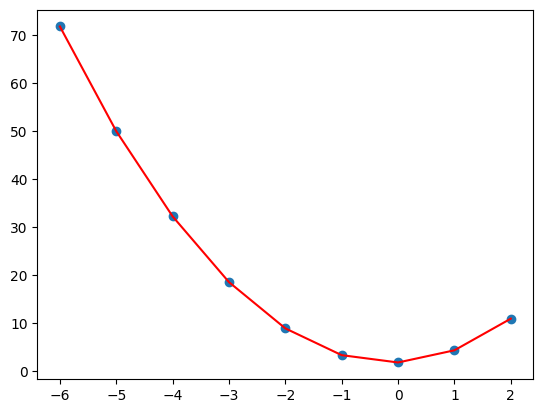

In [92]:
figure, axis = plt.subplots()
axis.scatter(data['x'], data['y'])
axis.plot(data['x'], prediction, 'r', label='Prediction')

In [93]:
# 2. Створіть нейронну мережу, яка правильно класифікує об’єкти, використовуючи дані з таблиці. Відповідь мережі: якщо «Параметр 1» = 1, то 1-й клас, якщо «Параметр 2» = «Параметр 3», то 2-й клас, інакше – 3-й клас.

In [95]:
df = pd.DataFrame({
    'param1': [1, 2, 3, 4, 5, 6, 7, 8, 9],
    'param2': [1, 1, 0, 0, 0, 0, 0, 1, 0],
    'param3': [1, 0, 1, 0, 1, 1, 0, 1, 0],
    'class': [3, 1, 1, 1, 1, 2, 1, 2, 3]
})

In [96]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(3, input_dim=3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [99]:
model.fit(df[['param1', 'param2', 'param3']].values,
          pd.get_dummies(df['class']).values,
          epochs=10000,
          verbose=0)

In [105]:
predictions = model.predict(df[['param1', 'param2', 'param3']].values)
threshold = 0.5
predictions[predictions >= threshold] = 1
predictions[predictions < threshold] = 0

1/1 [==============================] - 0s 18ms/step


In [106]:
predictions

array([[0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)